In [ ]:
# %tensorflow_version 1.x

### The aim is to create a binary image classifier that could differentiate the Non — Emergency Vehicles eg. private owned vehicles . from the emergency vehicles (police vehicles , ambulances, etc).


### Why Is this important?

Fatalities due to traffic delays of emergency vehicles such as ambulances & fire brigades is a huge problem. In daily life, we often see that emergency vehicles face difficulty in passing through traffic.

So differentiating a vehicle into an emergency and non-emergency category can be an important component in traffic monitoring as well as self-driving car systems, as reaching on time to their destination is critical for these services.

### Data Description

- There are a total of **1646** images in the train set and **706** in the test set.
- There are two `.csv` files which contain the train and test image names.
- 0 stands for Non-Emergency vehicles and 1 stands for Emergency Vehicles.

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Early Stopping

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Setting up Early Stopping</ol>
<ol>7. Training the model using Early Stopping</ol>
<ol>8. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [3]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [4]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [6]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the data

In [7]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [8]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [9]:
# normalizing the pixel values
X = X / X.max()

In [ ]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

## 4. Defining the model architecture

In [ ]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [ ]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Setting up Early Stopping

- In Keras, a **callback** is a set of functions or operations that are automatically executed during the training process of a model. Callbacks are especially useful for monitoring the training process, improving performance, or saving models, among other tasks. The keras.callbacks module provides a variety of predefined callbacks that can be used directly or customized.

### Purpose of Callbacks:
- Callbacks allow you to perform specific actions at certain stages of the model training process, such as:

- At the start or end of an epoch.
- At the start or end of a batch.
- After training is complete.
- Typical Use Cases of Callbacks:
- Monitoring and Adjusting Learning Rate: Adjusting the learning rate dynamically during training based on model performance.
- Stopping Early: Ending training when the model stops improving on a validation set (i.e., using EarlyStopping).
- Model Checkpoints: Saving the best model weights during training.
- Logging: Recording detailed information about the training process.
- TensorBoard: Logging performance metrics for visualization during training.

`EarlyStoping`
- Stops training early if the model performance on a validation set stops improving after a specified number of epochs.
``` python
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

```
```ModelCheckpoint```
- Saves the model (or just the weights) at regular intervals, often based on the validation performance. This is useful if you want to keep the model with the best validation performance.

```python
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
```
``` ReduceLROnPlateau```  
```python
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
```
- The ``factor`` parameter determines how much to reduce the learning rate by when the monitored metric (like validation loss) stops improving.
- The ``patience`` parameter determines how many epochs to wait before reducing the learning rate, after the monitored metric stops improving.

### TensorBoard:

Enables the use of **TensorBoard** to visualize metrics like loss, accuracy, learning rates, etc., in real-time.

**Example**:

```python
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs')
```
### CSVLogger:

Logs training and validation metrics to a CSV file, making it easier to track the progress and analyze the results after training.

**Example**:

```python
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('training_log.csv')

```
### LearningRateScheduler:

Dynamically adjusts the learning rate based on a predefined schedule.

**Example**:

```python
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 10))

lr_scheduler = LearningRateScheduler(lr_schedule)
```


In [ ]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [ ]:
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')
# min_delta -minimum change in the monitored metric to qualify as an improvement.
#If min_delta=0.01 and the validation loss improves from 0.30 to 0.29 (a change of 0.01), it will count as an improvement.
# mode ='min'-minimize the monitored metric

## 7. Training the model using Early Stopping

- total training images = 1646
- batch 128 
- 1 epoch = 1646/128 iterations 

### Iterations per epoch: 
$
\text{Iterations per epoch} = \frac{\text{Total training images}}{\text{Batch size}} 
= \frac{1646}{128} = 12.86 \approx 13
$


In [ ]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=1, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

## 8. Evaluating model performance

In [57]:
y_pred = np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)
y_pred

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy on validation set: 0.5609065155807366


In [59]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy on validation set: 0.5609065155807366


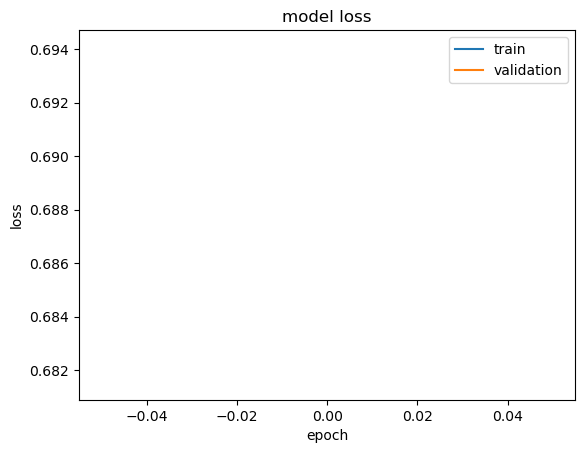

In [60]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Hyperparameter tuning for Early Stopping (Increasing the patience value)

In [65]:
# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# Define the optimizer after defining the model architecture
adam = Adam()


# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [66]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

- The model will stop training if the validation loss does not improve by at least 0.01 for 10 consecutive epochs.
- Otherwise, it will train for the full 30 epochs as specified.

In [69]:
# you guys train the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=30, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.7524 - loss: 0.5712 - val_accuracy: 0.7068 - val_loss: 0.6196
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7601 - loss: 0.5539 - val_accuracy: 0.6459 - val_loss: 0.6505
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.5949 - loss: 0.6511 - val_accuracy: 0.5609 - val_loss: 0.7026
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.6745 - loss: 0.5958 - val_accuracy: 0.7082 - val_loss: 0.6390
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.7509 - loss: 0.5783 - val_accuracy: 0.5567 - val_loss: 0.6681
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.5561 - loss: 0.6757 - val_accuracy: 0.5609 - val_loss: 0.6961
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.5730 - loss: 0.6962 - val_accuracy: 0.5609 - val_loss: 0.6837
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.5917 - loss: 0.6765 - val_accuracy: 0.

In [70]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred<0.5, 0, 1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [71]:
# accuracy on validation set
y_pred = np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy on validation set: 0.5609065155807366 %


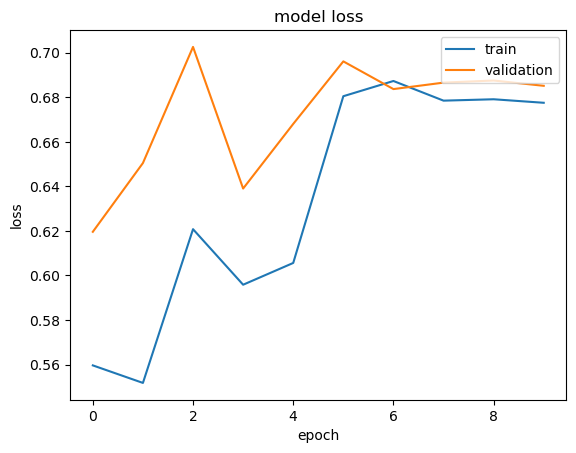

In [72]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()